In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import csv

# def scrape_detik(page):
#     url = f'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page={page}'
#     req = requests.get(url)
#     sop = BeautifulSoup(req.text, 'html.parser')
#     li = sop.find('div', class_='list media_rows list-berita')
#     lin = li.find_all('article')

#     results = []
#     for x in lin:
#         link = x.find('a')['href']
#         date = x.find('a').find('span', class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
#         headline = x.find('a').find('h2').text

#         ge_ = requests.get(link).text
#         sop_ = BeautifulSoup(ge_, 'html.parser')
#         content = sop_.find('div', class_='detail__body-text itp_bodycontent')

#         if content is not None:
#             paragraphs = content.find_all('p')
#             content_ = ''.join([p.get_text(strip=True) for p in paragraphs])
#         else:
#             content_ = ''

#         results.append({
#             'link': link,
#             'date': date,
#             'headline': headline,
#             'content': content_
#         })

#     return results

# # Panggil fungsi untuk scraping semua artikel
# all_results = []
# for page in range(1, 1112):  # scrape 11 pages
#     page_results = scrape_detik(page)
#     all_results.extend(page_results)

# # Tulis hasil ke file CSV
# with open('detik_results.csv', 'w', newline='', encoding='utf-8') as f:
#     writer = csv.DictWriter(f, fieldnames=['link', 'date', 'headline', 'content'])
#     writer.writeheader()
#     writer.writerows(all_results)

# # Baca file CSV
# with open('detik_results.csv', 'r', newline='', encoding='utf-8') as f:
#     reader = csv.DictReader(f)
#     rows = list(reader)

# # Tampilkan hasil
# print("Search results:")
# for i, row in enumerate(rows):
#     print(f"[{i+1}] {row['headline']}")
#     print(f"    {row['date']}")
#     print(f"    {row['content']}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ppw/detik_results.csv')
data

,link,date,headline,content
0,https://www.detik.com/jatim/berita/d-7032383/k...,12 Nov 2023 13:11,KPU Bondowoso Sambut Baik Aksi Stakeholder Pat...,Untuk mendinginkan suasana agar tetap kondusif...
1,https://www.detik.com/sumut/berita/d-7032359/s...,12 Nov 2023 13:00,"Spanduk Ganjar Dicopot di Siantar, Sandiaga Bi...","Ketua Dewan Pakar TPN Ganjar-Mahfud, Sandiaga ..."
2,https://news.detik.com/pemilu/d-7032377/gibran...,12 Nov 2023 12:57,Gibran ke Pendukung: Kalau Banyak Fitnah dan N...,Bakal cawapresGibran Rakabuming Rakakembali me...
3,https://news.detik.com/pemilu/d-7032360/anies-...,12 Nov 2023 12:35,Anies Yakin Menang Pilpres Satu Putaran,Bakal calon presiden (bacapres) Koalisi Peruba...
4,https://www.detik.com/jogja/berita/d-7032354/k...,12 Nov 2023 12:28,"Klaim Anies Baswedan Didukung PPP, Sandiaga Un...","Bacapres Koalisi Perubahan, Anies Baswedan, me..."
...,...,...,...,...
9967,https://news.detik.com/pemilu/d-6754534/pdip-u...,04 Jun 2023 15:28,PDIP Ungkap PAN Sodorkan Nama Erick Thohir Jad...,SekjenPDIPHasto Kristiyanto mengungkap isi per...
9968,https://news.detik.com/detiktv/d-6754525/pdip-...,04 Jun 2023 15:25,PDIP: Jokowi Cawe-cawe untuk Kemajuan Indonesi...,NaN
9969,https://news.detik.com/detiktv/d-6754521/pantu...,04 Jun 2023 15:20,"Pantun Hasto: Jokowi-Ganjar Sehati, Kesatupadu...",NaN
9970,https://www.detik.com/jatim/berita/d-6754489/s...,04 Jun 2023 14:54,Survei Capres SRS: Prabowo Ungguli Ganjar-Anie...,Lembaga survei Surabaya Research Syndicate (SR...


In [ ]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

In [ ]:
# Impor pustaka spaCy
import spacy
import nltk

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['content'].iloc[600]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:9971])  # Mengambil dua kalimat pertama sebagai ringkasan

# Cetak ringkasan
print(ringkasan)

Bacawapres Gibran Rakabuming Rakabertemu dengan Anies Baswedan dan Muhaimin Iskandar (Cak Imin) di acara Haul Al Habib Ali bin Muhammad Al Habsyi di Masjid Riyadh, Solo. Keduanya sempat ngobrol sejenak. "Ngobrol sedikit. Nggih di dalam. Disamperin saja Pak Anies masih di dalam," tutur Gibran kepada wartawan, Sabtu (4/11/2023)."Ya dikit tadi, masih acara. Terus makan bareng. Udah-udah makasih ya," imbuhnya. ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENTCak Imin juga menyatakan hal serupa. Ia mengatakan Cak Imin dan Gibran saling bertanya kabar. "Iya sempat (ngobrol). Nanya-nanya kabar saja," kata Cak Imin. Pantauandetikcomdi lokasi, Anies-Cak Imin terlihat tiba lebih dulu. Keduanya sampai di lokasi pukul 07.00 WIB.Sementara Gibran, baru tampak menghadiri acara pada pukul 10.30 WIB. Gibran pun datang ditemani oleh sekjen Partai Gerindra, Ahmad Muzani. Mereka pun duduk saling berdekatan. Gibran terlihat duduk di sebelah kanan dari posisi Anies dan Cak Imin. Ketiganya terlihat khusyuk mengik

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: Bacawapres Gibran Rakabuming Rakabertemu dengan Anies Baswedan dan Muhaimin Iskandar (Cak Imin) di acara Haul Al Habib Ali bin Muhammad Al Habsyi di Masjid Riyadh, Solo.
acara: 0.1448
al: 0.4033
ali: 0.2016
anies: 0.1448
bacawapres: 0.2016
baswedan: 0.2016
bin: 0.2016
cak: 0.1335
dan: 0.1586
dengan: 0.2016
di: 0.2670
gibran: 0.1239
habib: 0.2016
habsyi: 0.2016
haul: 0.2016
imin: 0.1239
iskandar: 0.2016
masjid: 0.2016
muhaimin: 0.2016
muhammad: 0.2016
rakabertemu: 0.2016
rakabuming: 0.2016
riyadh: 0.2016
solo: 0.2016

Kalimat 2: Keduanya sempat ngobrol sejenak.
keduanya: 0.4931
ngobrol: 0.4432
sejenak: 0.5633
sempat: 0.4931

Kalimat 3: "Ngobrol sedikit.
ngobrol: 0.6184
sedikit: 0.7859

Kalimat 4: Nggih di dalam.
dalam: 0.5895
di: 0.4459
nggih: 0.6735

Kalimat 5: Disamperin saja Pak Anies masih di dalam," tutur Gibran kepada wartawan, Sabtu (4/11/2023).
11: 0.2932
2023: 0.2932
anies: 0.2106
dalam: 0.2567
di: 0.1941
disamperin: 0.2932
gibran: 0.1802
kepada: 0.2932
masih: 0.256

In [ ]:
# kalimat = nltk.sent_tokenize(ringkasan)

# # Gunakan TfidfVectorizer dari scikit-learn
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

# terms = tfidf_vectorizer.get_feature_names_out()

# # Untuk output, jika terlalu besar, mungkin sebaiknya dihindari untuk mencetak semua nilai TF-IDF.
# # Sebagai gantinya, kamu dapat membatasi pencetakan untuk sebagian kecil dari nilai tfidf_matrix.

# n_kalimat = min(len(kalimat), 977)  # Ambil 977 kalimat atau kurang
# n_terms = 20  # Ambil 20 kata kunci dengan nilai TF-IDF tertinggi

# for i in range(n_kalimat):
#     print(f"\nKalimat {i+1}: {kalimat[i]}")
#     tfidf_scores = [(term, tfidf_matrix[i, j]) for j, term in enumerate(terms)]
#     tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:n_terms]
#     for term, score in tfidf_scores:
#         print(f"{term}: {score:.4f}")

# Cosine Similarit

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.0000
Similarity Kalimat 1 dan Kalimat 3: 0.0000
Similarity Kalimat 1 dan Kalimat 4: 0.1191
Similarity Kalimat 1 dan Kalimat 5: 0.1047
Similarity Kalimat 1 dan Kalimat 6: 0.0517
Similarity Kalimat 1 dan Kalimat 7: 0.0000
Similarity Kalimat 1 dan Kalimat 8: 0.0000
Similarity Kalimat 1 dan Kalimat 9: 0.0249
Similarity Kalimat 1 dan Kalimat 10: 0.1451
Similarity Kalimat 1 dan Kalimat 11: 0.0000
Similarity Kalimat 1 dan Kalimat 12: 0.0607
Similarity Kalimat 1 dan Kalimat 13: 0.1036
Similarity Kalimat 1 dan Kalimat 14: 0.0781
Similarity Kalimat 1 dan Kalimat 15: 0.0252
Similarity Kalimat 1 dan Kalimat 16: 0.0000
Similarity Kalimat 1 dan Kalimat 17: 0.2264
Similarity Kalimat 1 dan Kalimat 18: 0.0511
Similarity Kalimat 2 dan Kalimat 3: 0.2741
Similarity Kalimat 2 dan Kalimat 4: 0.0000
Similarity Kalimat 2 dan Kalimat 5: 0.0000
Similarity Kalimat 2 dan Kalimat 6: 0.0000
Similarity Kalimat 2 dan Kalimat 7: 0.0000
Similarity Kalimat 2 dan Kalimat 8: 0.0000
Si

In [ ]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.000000,0.000000,0.119061,0.104668,0.051688,0.0,0.00000,0.024877,0.145127,0.000000,0.060709,0.103623,0.078147,0.025194,0.000000,0.226371,0.051142
1,0.000000,1.000000,0.274068,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.505246,0.000000,0.000000,0.094484,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.274068,1.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.315024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.119061,0.000000,0.000000,1.000000,0.237880,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064638,0.000000,0.000000,0.103406,0.000000
4,0.104668,0.000000,0.000000,0.237880,1.000000,0.111657,0.0,0.00000,0.000000,0.043983,0.000000,0.082872,0.058354,0.052397,0.036639,0.000000,0.136792,0.000000
5,0.051688,0.000000,0.000000,0.000000,0.111657,1.000000,0.0,0.14639,0.000000,0.000000,0.000000,0.000000,0.000000,0.056123,0.000000,0.000000,0.000000,0.126069
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.146390,0.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.024877,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.048981,0.000000,0.045515,0.047606,0.000000,0.000000,0.000000,0.043213,0.000000
9,0.145127,0.000000,0.000000,0.000000,0.043983,0.000000,0.0,0.00000,0.048981,1.000000,0.000000,0.231726,0.125021,0.032838,0.049603,0.146697,0.252089,0.000000


# Graph

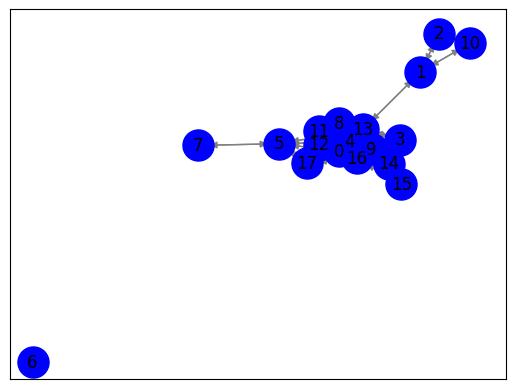

In [ ]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Closenes Centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 13: 0.6845
Node 0: 0.6547
Node 16: 0.6275
Node 4: 0.6024
Node 9: 0.5792
Node 12: 0.5577
Node 14: 0.5193
Node 17: 0.5193
Node 5: 0.5020
Node 3: 0.4858
Node 11: 0.4706
Node 1: 0.4563
Node 8: 0.4563
Node 15: 0.4070
Node 7: 0.3346
Node 2: 0.3204
Node 10: 0.3204
Node 6: 0.0000


In [ ]:
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 13: Closeness Centrality = 0.6845
Kalimat: Keduanya sampai di lokasi pukul 07.00 WIB.Sementara Gibran, baru tampak menghadiri acara pada pukul 10.30 WIB.

Node 0: Closeness Centrality = 0.6547
Kalimat: Bacawapres Gibran Rakabuming Rakabertemu dengan Anies Baswedan dan Muhaimin Iskandar (Cak Imin) di acara Haul Al Habib Ali bin Muhammad Al Habsyi di Masjid Riyadh, Solo.

Node 16: Closeness Centrality = 0.6275
Kalimat: Gibran terlihat duduk di sebelah kanan dari posisi Anies dan Cak Imin.



In [ ]:
pagerank = nx.pagerank(G)

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("\nSorted PageRank:")
for node, rank in sorted_pagerank:
    print(f"Node {node}: {rank:.4f}")


Sorted PageRank:
Node 0: 0.0956
Node 16: 0.0951
Node 13: 0.0940
Node 4: 0.0794
Node 9: 0.0785
Node 12: 0.0700
Node 14: 0.0553
Node 5: 0.0553
Node 11: 0.0536
Node 1: 0.0511
Node 17: 0.0483
Node 8: 0.0459
Node 2: 0.0404
Node 10: 0.0404
Node 3: 0.0390
Node 15: 0.0313
Node 7: 0.0181
Node 6: 0.0087


In [ ]:
print("\nNode Tertinggi dengan Kalimat:")
for node, rank in sorted_pagerank[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: PageRank = {rank:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 0: PageRank = 0.0956
Kalimat: Bacawapres Gibran Rakabuming Rakabertemu dengan Anies Baswedan dan Muhaimin Iskandar (Cak Imin) di acara Haul Al Habib Ali bin Muhammad Al Habsyi di Masjid Riyadh, Solo.

Node 16: PageRank = 0.0951
Kalimat: Gibran terlihat duduk di sebelah kanan dari posisi Anies dan Cak Imin.

Node 13: PageRank = 0.0940
Kalimat: Keduanya sampai di lokasi pukul 07.00 WIB.Sementara Gibran, baru tampak menghadiri acara pada pukul 10.30 WIB.



In [ ]:
# Hitung Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Eigenvector Centrality:")
for node, eigenvector_value in sorted_eigenvector:
    print(f"Node {node}: {eigenvector_value:.4f}")


Sorted Eigenvector Centrality:
Node 0: 0.3801
Node 16: 0.3754
Node 4: 0.3325
Node 13: 0.3320
Node 9: 0.3312
Node 12: 0.3126
Node 11: 0.2514
Node 14: 0.2422
Node 8: 0.2134
Node 17: 0.2022
Node 3: 0.1836
Node 5: 0.1639
Node 15: 0.1226
Node 1: 0.0446
Node 7: 0.0212
Node 2: 0.0066
Node 10: 0.0066
Node 6: 0.0000


In [ ]:
print("\nNode Tertinggi dengan Kalimat menggunakan Eigenvector Centrality:")
for node, eigenvector_value in sorted_eigenvector[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Eigenvector Centrality = {eigenvector_value:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat menggunakan Eigenvector Centrality:
Node 0: Eigenvector Centrality = 0.3801
Kalimat: Bacawapres Gibran Rakabuming Rakabertemu dengan Anies Baswedan dan Muhaimin Iskandar (Cak Imin) di acara Haul Al Habib Ali bin Muhammad Al Habsyi di Masjid Riyadh, Solo.

Node 16: Eigenvector Centrality = 0.3754
Kalimat: Gibran terlihat duduk di sebelah kanan dari posisi Anies dan Cak Imin.

Node 4: Eigenvector Centrality = 0.3325
Kalimat: Disamperin saja Pak Anies masih di dalam," tutur Gibran kepada wartawan, Sabtu (4/11/2023).



In [ ]:
# Hitung Eigenvalue Centrality
eigenvalue = nx.eigenvector_centrality_numpy(G)

sorted_eigenvalue = sorted(eigenvalue.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Eigenvalue Centrality:")
for node, eigenvalue_value in sorted_eigenvalue:
    print(f"Node {node}: {eigenvalue_value:.4f}")


Sorted Eigenvalue Centrality:
Node 0: 0.3801
Node 16: 0.3754
Node 4: 0.3325
Node 13: 0.3320
Node 9: 0.3312
Node 12: 0.3126
Node 11: 0.2514
Node 14: 0.2422
Node 8: 0.2134
Node 17: 0.2022
Node 3: 0.1836
Node 5: 0.1639
Node 15: 0.1226
Node 1: 0.0446
Node 7: 0.0212
Node 2: 0.0066
Node 10: 0.0066
Node 6: 0.0000


In [ ]:
print("\nNode Tertinggi dengan Kalimat menggunakan Eigenvalue Centrality:")
for node, eigenvalue_value in sorted_eigenvalue[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Eigenvalue Centrality = {eigenvalue_value:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat menggunakan Eigenvalue Centrality:
Node 0: Eigenvalue Centrality = 0.3801
Kalimat: Bacawapres Gibran Rakabuming Rakabertemu dengan Anies Baswedan dan Muhaimin Iskandar (Cak Imin) di acara Haul Al Habib Ali bin Muhammad Al Habsyi di Masjid Riyadh, Solo.

Node 16: Eigenvalue Centrality = 0.3754
Kalimat: Gibran terlihat duduk di sebelah kanan dari posisi Anies dan Cak Imin.

Node 4: Eigenvalue Centrality = 0.3325
Kalimat: Disamperin saja Pak Anies masih di dalam," tutur Gibran kepada wartawan, Sabtu (4/11/2023).

